In [1]:
import glob
import os

#import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import palettable.colorbrewer.diverging as pld

import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy import integrate  
#import scipy.signal as scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

%matplotlib widget

In [2]:
## Plotting parameters

palette = pld.RdYlGn_4_r
cmap = palette.mpl_colormap
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


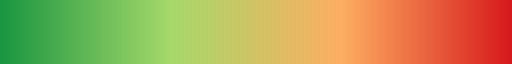

In [3]:
cmap

In [4]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
# cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/2022081722'
subfolder = glob.glob(cwd + '/fluo**')
subfolder.sort()
# del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/2022081722/fluorescence_Br
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/UVVIS_OceanView/2022081722/fluorescence_Cl


In [5]:
'OceanView' in cwd

True

In [6]:
title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
print(*title, sep='\n')

# title = ['CsPb 6mM + Br 12 mM',
#          'CsPb 6mM + Br 12 mM + ZnI2 8uL/min', 
#          'CsPb 6mM + Br 12 mM + ZnI2 16uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 32uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 48uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 64uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 80uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 96uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 112uL/min',
#          'CsPb 6mM + Br 12 mM + ZnI2 128uL/min']
#          # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

# label = ['CsPbBr',
#          'ZnI2 8 uL/min', 
#          'ZnI2 16 uL/min',
#          'ZnI2 32 uL/min',
#          'ZnI2 48 uL/min',
#          'ZnI2 64 uL/min', 
#          'ZnI2 80 uL/min',
#          'ZnI2 96 uL/min',
#          'ZnI2 112 uL/min',
#          'ZnI2 128 uL/min']
#          # 'ZnI2 128 uL/min']

fluorescence_Br
fluorescence_Cl


In [7]:
# ## Reading dark and reference
# dark = glob.glob(cwd + '/' + 'Dark_100**.csv')
# ref = glob.glob(cwd + '/' + 'tol**100**.csv')

# dark_df = pd.read_csv(dark[0], skiprows=5, sep=',')
# ref_df = pd.read_csv(ref[0], skiprows=5, sep=',')

In [8]:
# plt.figure()
# plt.plot(ref_df.Energy, ref_df.Sample)

/opt/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


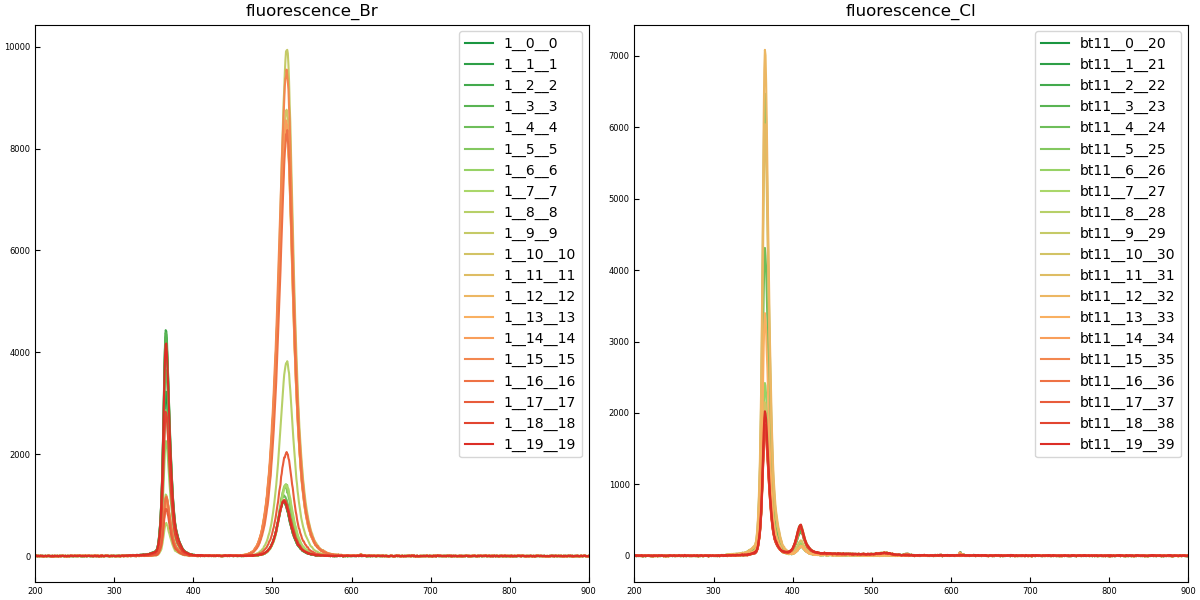

In [9]:
import warnings
warnings.filterwarnings(action='once')

## Plot All PL profiles in each subfolder
#f1, ax1 = plt.subplots(2, int(np.rint(len(subfolder)/2)), figsize = (10, 8), constrained_layout=True)
f1, ax1 = plt.subplots(1, 2, figsize = (12, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

ax1 = ax1.flatten()
df = pd.DataFrame()
df_Br = pd.DataFrame()
df_Cl = pd.DataFrame()
df_norm2 = pd.DataFrame()

## Wavelength range
w1 = 20
w2 = 770

for i in range(len(subfolder)):
# for i in range(1):
    data = glob.glob(subfolder[i] + '/**.txt')
    # data_files = subfolder
    data_files = sorted(data, key = lambda x: (len (x), x))
    # del data_files[0]
    
    ## Data file range
    k1 = 0
    k2 = len(data_files)
    
    color_idx = np.linspace(0, 1, k2-k1+1)
    #ax1[i].set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax1[i].set_title(title[i], fontsize=12)
    df_i = pd.DataFrame()
    
    # if i == 0: skiprows=8
    # else: skiprows=10
    
    for j in range(k1, k2):
        if 'OceanView' in cwd:
            df_j = pd.read_csv(data_files[j], names=['wavelength', 'intensity'], skiprows=14, sep='\t')
            PL = df_j['intensity']
            df_j['Energy'] = df_j['wavelength']          
        else:
            df_j = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
            PL = df_j['Sample']-dark_df.Sample
        label = os.path.basename(data_files[j])[16:-4]
        df_j[label] = PL
        ax1[i].plot(df_j.Energy, PL, color=cmap(color_idx[j-k1]), label=label)
        ax1[i].set_xlim(200, 900)
        # ax1[i].set_ylim(-0.1, max(absorbance[100:800])+0.2)
        ax1[i].tick_params(axis='both', direction='in', labelsize=6)
        
        ## Insert Annotation
        '''
        at = AnchoredText(label[i], prop=dict(size=10), frameon=True, loc='upper right')
        at.patch.set_boxstyle("round,pad=0.01,rounding_size=0.3")
        ax1[i].add_artist(at)
        '''
        
        # df_i[label] = df_j.intensity
        # df_i[f'Iten_{j}'] = df_j.intensity
        df_i = pd.concat([df_i, df_j[label]], axis=1, ignore_index=False)  
    
    ax1[i].legend()
    if 'Br' in os.path.basename(subfolder[i]):
        df_Br = pd.concat([df_Br, df_i], axis=1, ignore_index=False)
        # df_Br['Energy'] = df_j.Energy
    elif 'Cl' in os.path.basename(subfolder[i]):
        df_Cl = pd.concat([df_Cl, df_i], axis=1, ignore_index=False)
        # df_Cl['Energy'] = df_j.Energy
    df[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1)    
    x = df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
    df_norm2[f'{os.path.basename(subfolder[i])}']= x_scaled.flatten()

# for i in range(len(subfolder)): ax1[i].legend()
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=4)

    
df['Energy'] = df_j.Energy
#df_norm2['wavelength'] = df_j.wavelength.loc[w1:w2]
df_norm2.loc[0:w2-w1, 'Energy'] = df_j.Energy.loc[w1:w2].values

In [10]:
os.path.basename(data_files[0])[22:-4]

'0__20'

In [11]:
df_i[210:215]
df_i.describe()

,bt11__0__20,bt11__1__21,bt11__2__22,bt11__3__23,bt11__4__24,bt11__5__25,bt11__6__26,bt11__7__27,bt11__8__28,bt11__9__29,bt11__10__30,bt11__11__31,bt11__12__32,bt11__13__33,bt11__14__34,bt11__15__35,bt11__16__36,bt11__17__37,bt11__18__38,bt11__19__39
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,38.518199,38.702107,39.589770,39.246169,62.788314,94.186782,39.360421,43.309387,36.952107,41.419540,35.485632,87.728659,101.591954,51.754100,38.053640,37.756705,36.518199,38.076897,37.944713,43.530651
std,180.569432,180.497205,183.043297,177.299928,388.520600,589.764317,219.344047,194.919828,174.450845,190.811601,194.976167,546.360780,643.393470,306.382204,177.224511,176.662043,166.860041,166.007084,170.396270,188.402424
min,-8.000000,-11.000000,-7.620000,-6.250000,-8.750000,-8.250000,-8.380000,-8.750000,-11.250000,-7.250000,-7.250000,-7.120000,-9.250000,-7.380000,-8.500000,-9.250000,-7.750000,-7.880000,-8.880000,-8.250000
25%,0.000000,-1.000000,-0.620000,2.750000,-0.750000,-0.250000,-0.380000,1.250000,-1.250000,-0.250000,-1.250000,-0.120000,-1.250000,0.620000,-1.500000,-1.250000,-0.750000,1.120000,0.120000,1.750000
50%,3.000000,2.000000,2.380000,5.750000,2.250000,2.750000,2.620000,3.250000,1.750000,2.750000,1.750000,2.880000,1.750000,3.620000,2.500000,1.750000,2.250000,4.120000,3.120000,5.750000
75%,15.000000,10.250000,11.380000,14.750000,6.250000,6.750000,9.620000,14.500000,9.750000,11.000000,8.750000,6.880000,5.750000,8.620000,14.500000,9.750000,10.250000,12.120000,12.120000,14.750000
max,1964.000000,1932.000000,1982.380000,1920.750000,4311.250000,6470.750000,2419.620000,2100.250000,1884.750000,2056.750000,2150.750000,6044.880000,7084.750000,3398.620000,1901.500000,1906.750000,1805.250000,1782.120000,1833.120000,2023.750000


In [12]:
df_Br.shape

(1044, 20)

In [13]:
df_Br.columns

Index(['1__0__0', '1__1__1', '1__2__2', '1__3__3', '1__4__4', '1__5__5',
       '1__6__6', '1__7__7', '1__8__8', '1__9__9', '1__10__10', '1__11__11',
       '1__12__12', '1__13__13', '1__14__14', '1__15__15', '1__16__16',
       '1__17__17', '1__18__18', '1__19__19'],
      dtype='object')

/opt/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:412: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Widget, self).__init__(**kwargs)


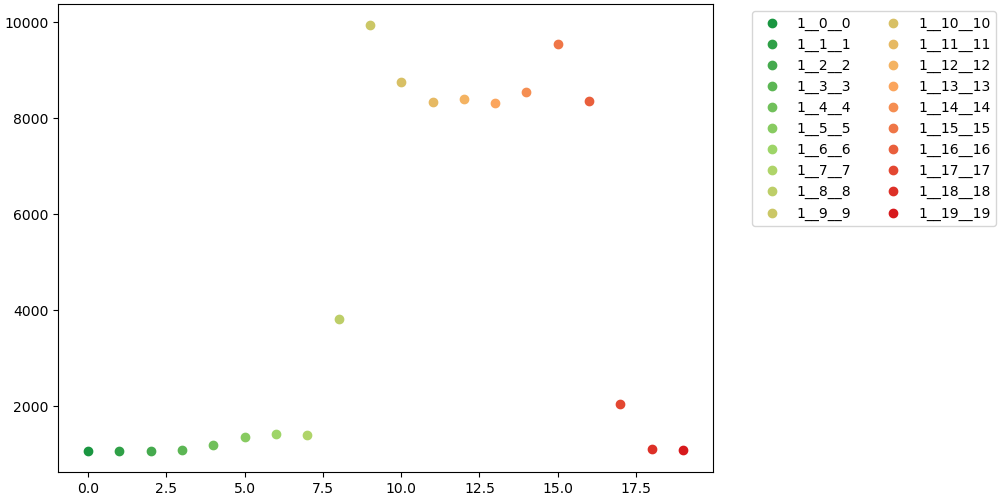

In [14]:
r1 = 335
r2 = 735
df_Br[r1:r2].max()
color_idx = np.linspace(0, 1, df_Br.shape[1])
f2, ax2 = plt.subplots(1, 1, figsize = (10, 5), constrained_layout=True)
for i in range(df_Br.shape[1]):
    ax2.plot(i, df_Br[r1:r2].max()[i], 'o', color=cmap(color_idx[i]), label=df_Br.columns[i])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', ncol=2)